In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the dataset directly from kaggle and place in our project directory.
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 84% 125M/149M [00:00<00:00, 254MB/s] 
100% 149M/149M [00:00<00:00, 244MB/s]


In [3]:
# Function to iterate through each of the MRI scans and load the metadata into a dataframe.
def get_class_paths(path):
  classes = []
  class_paths = []

  # Iterate through directories in the training path.
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it's a directory.
    if os.path.isdir(label_path):
      # Iterate through images in the label directory.
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists.
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data.
  df = pd.DataFrame({
      "Class Path": class_paths,
      "Class": classes
  })

  return df

In [4]:
# Load the metadata for the training data set and save the output.
tr_df = get_class_paths("/content/Training")

In [5]:
# Print the dataframe of training data image paths (Class Path) and tumor labels (Class).
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0923.jpg,notumor
1,/content/Training/notumor/Tr-no_0146.jpg,notumor
2,/content/Training/notumor/Tr-no_1491.jpg,notumor
3,/content/Training/notumor/Tr-no_1500.jpg,notumor
4,/content/Training/notumor/Tr-no_0363.jpg,notumor
...,...,...
5707,/content/Training/pituitary/Tr-pi_0237.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0783.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0557.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0968.jpg,pituitary


In [6]:
# Load the metadata for the testing data set and save the output.
ts_df = get_class_paths("/content/Testing")

In [7]:
# Print the dataframe of testing data image paths (Class Path) and tumor labels (Class).
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0305.jpg,notumor
1,/content/Testing/notumor/Te-no_0155.jpg,notumor
2,/content/Testing/notumor/Te-no_0176.jpg,notumor
3,/content/Testing/notumor/Te-no_0091.jpg,notumor
4,/content/Testing/notumor/Te-no_0346.jpg,notumor
...,...,...
1306,/content/Testing/pituitary/Te-pi_0072.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0104.jpg,pituitary
1308,/content/Testing/pituitary/Te-piTr_0000.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0275.jpg,pituitary


# Exploring the data to get a better understanding of it

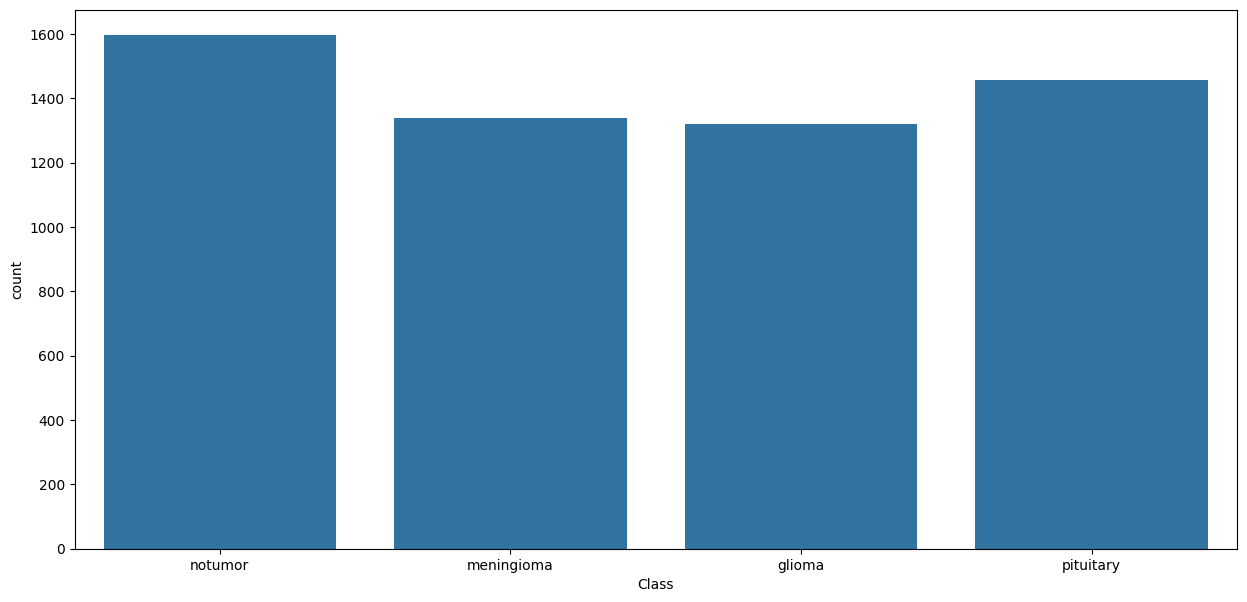

In [8]:
# Plot the different types of tumors and how many of each there are in the training data set.
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df["Class"])

We can see each class has approximately the same amount of MRI scans in the data set, making it a fairly balanced data set.

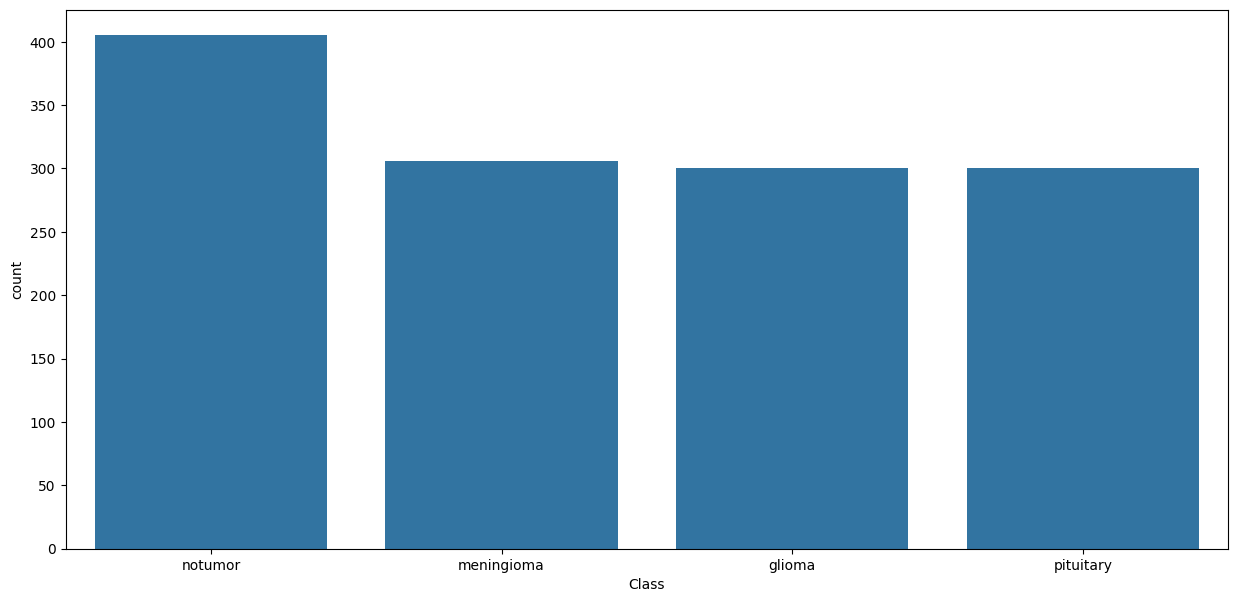

In [9]:
# Plot the different types of tumors and how many of each there are in the testing data set.
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df["Class"])

# Splitting our data into training, testing and validation data sets

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

# Sequential is a class that allows us to build a neural network model layer by layer.
# Think of it like stacking building blocks on top of each other, where each block represents a layer
# in the neural network.  This allows us to more easily understand the architecture of deep-learning
# models.
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Split the testing data set into a validation and testing set.
# Set aside some of the testing data for validation (crutial for tuning the model and preventing overfitting.)
# Stratify ensures the data is split in a way that maintains the proportionality of each class label in the original
# data set, in the training and testing sets.
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df["Class"])

In [12]:
# Print the newly created validation dataframe.
valid_df

,Class Path,Class
668,/content/Testing/meningioma/Te-me_0276.jpg,meningioma
447,/content/Testing/meningioma/Te-me_0051.jpg,meningioma
1308,/content/Testing/pituitary/Te-piTr_0000.jpg,pituitary
728,/content/Testing/glioma/Te-gl_0031.jpg,glioma
1302,/content/Testing/pituitary/Te-pi_0056.jpg,pituitary
...,...,...
656,/content/Testing/meningioma/Te-me_0139.jpg,meningioma
152,/content/Testing/notumor/Te-no_0170.jpg,notumor
1232,/content/Testing/pituitary/Te-pi_0213.jpg,pituitary
930,/content/Testing/glioma/Te-gl_0111.jpg,glioma


In [13]:
# Print the newly created testing dataframe.
ts_df

,Class Path,Class
22,/content/Testing/notumor/Te-no_0329.jpg,notumor
998,/content/Testing/glioma/Te-gl_0039.jpg,glioma
1161,/content/Testing/pituitary/Te-pi_0285.jpg,pituitary
524,/content/Testing/meningioma/Te-me_0274.jpg,meningioma
233,/content/Testing/notumor/Te-no_0277.jpg,notumor
...,...,...
1248,/content/Testing/pituitary/Te-pi_0228.jpg,pituitary
1133,/content/Testing/pituitary/Te-pi_0236.jpg,pituitary
218,/content/Testing/notumor/Te-no_0320.jpg,notumor
326,/content/Testing/notumor/Te-no_0070.jpg,notumor


# Pre-processing the data

In [14]:
# The number of images the model will process at once.
batch_size = 32

# Set image size for all MRI scans to be resized to.
img_size = (299, 299)
# Rescale the pixels values, and randomly adjust the brightness of the images to help our model
# be more robust.
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
# For testing, only rescale the pixel values, without changing the brightness.  This is because we
# want our data to be consistent and not introduce randomness.
ts_gen = ImageDataGenerator(rescale=1/255)

In [16]:
## Use the generators to create 3 data flows: one for training, one for testing and one for validation. ##
## Take the data from the dataframes and prepare them to be fed to our deep-learning model. ##

tr_gen = image_generator.flow_from_dataframe(tr_df, x_col="Class Path", y_col="Class", batch_size=batch_size, target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col="Class Path", y_col="Class", batch_size=batch_size, target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col="Class Path", y_col="Class", batch_size=16, target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


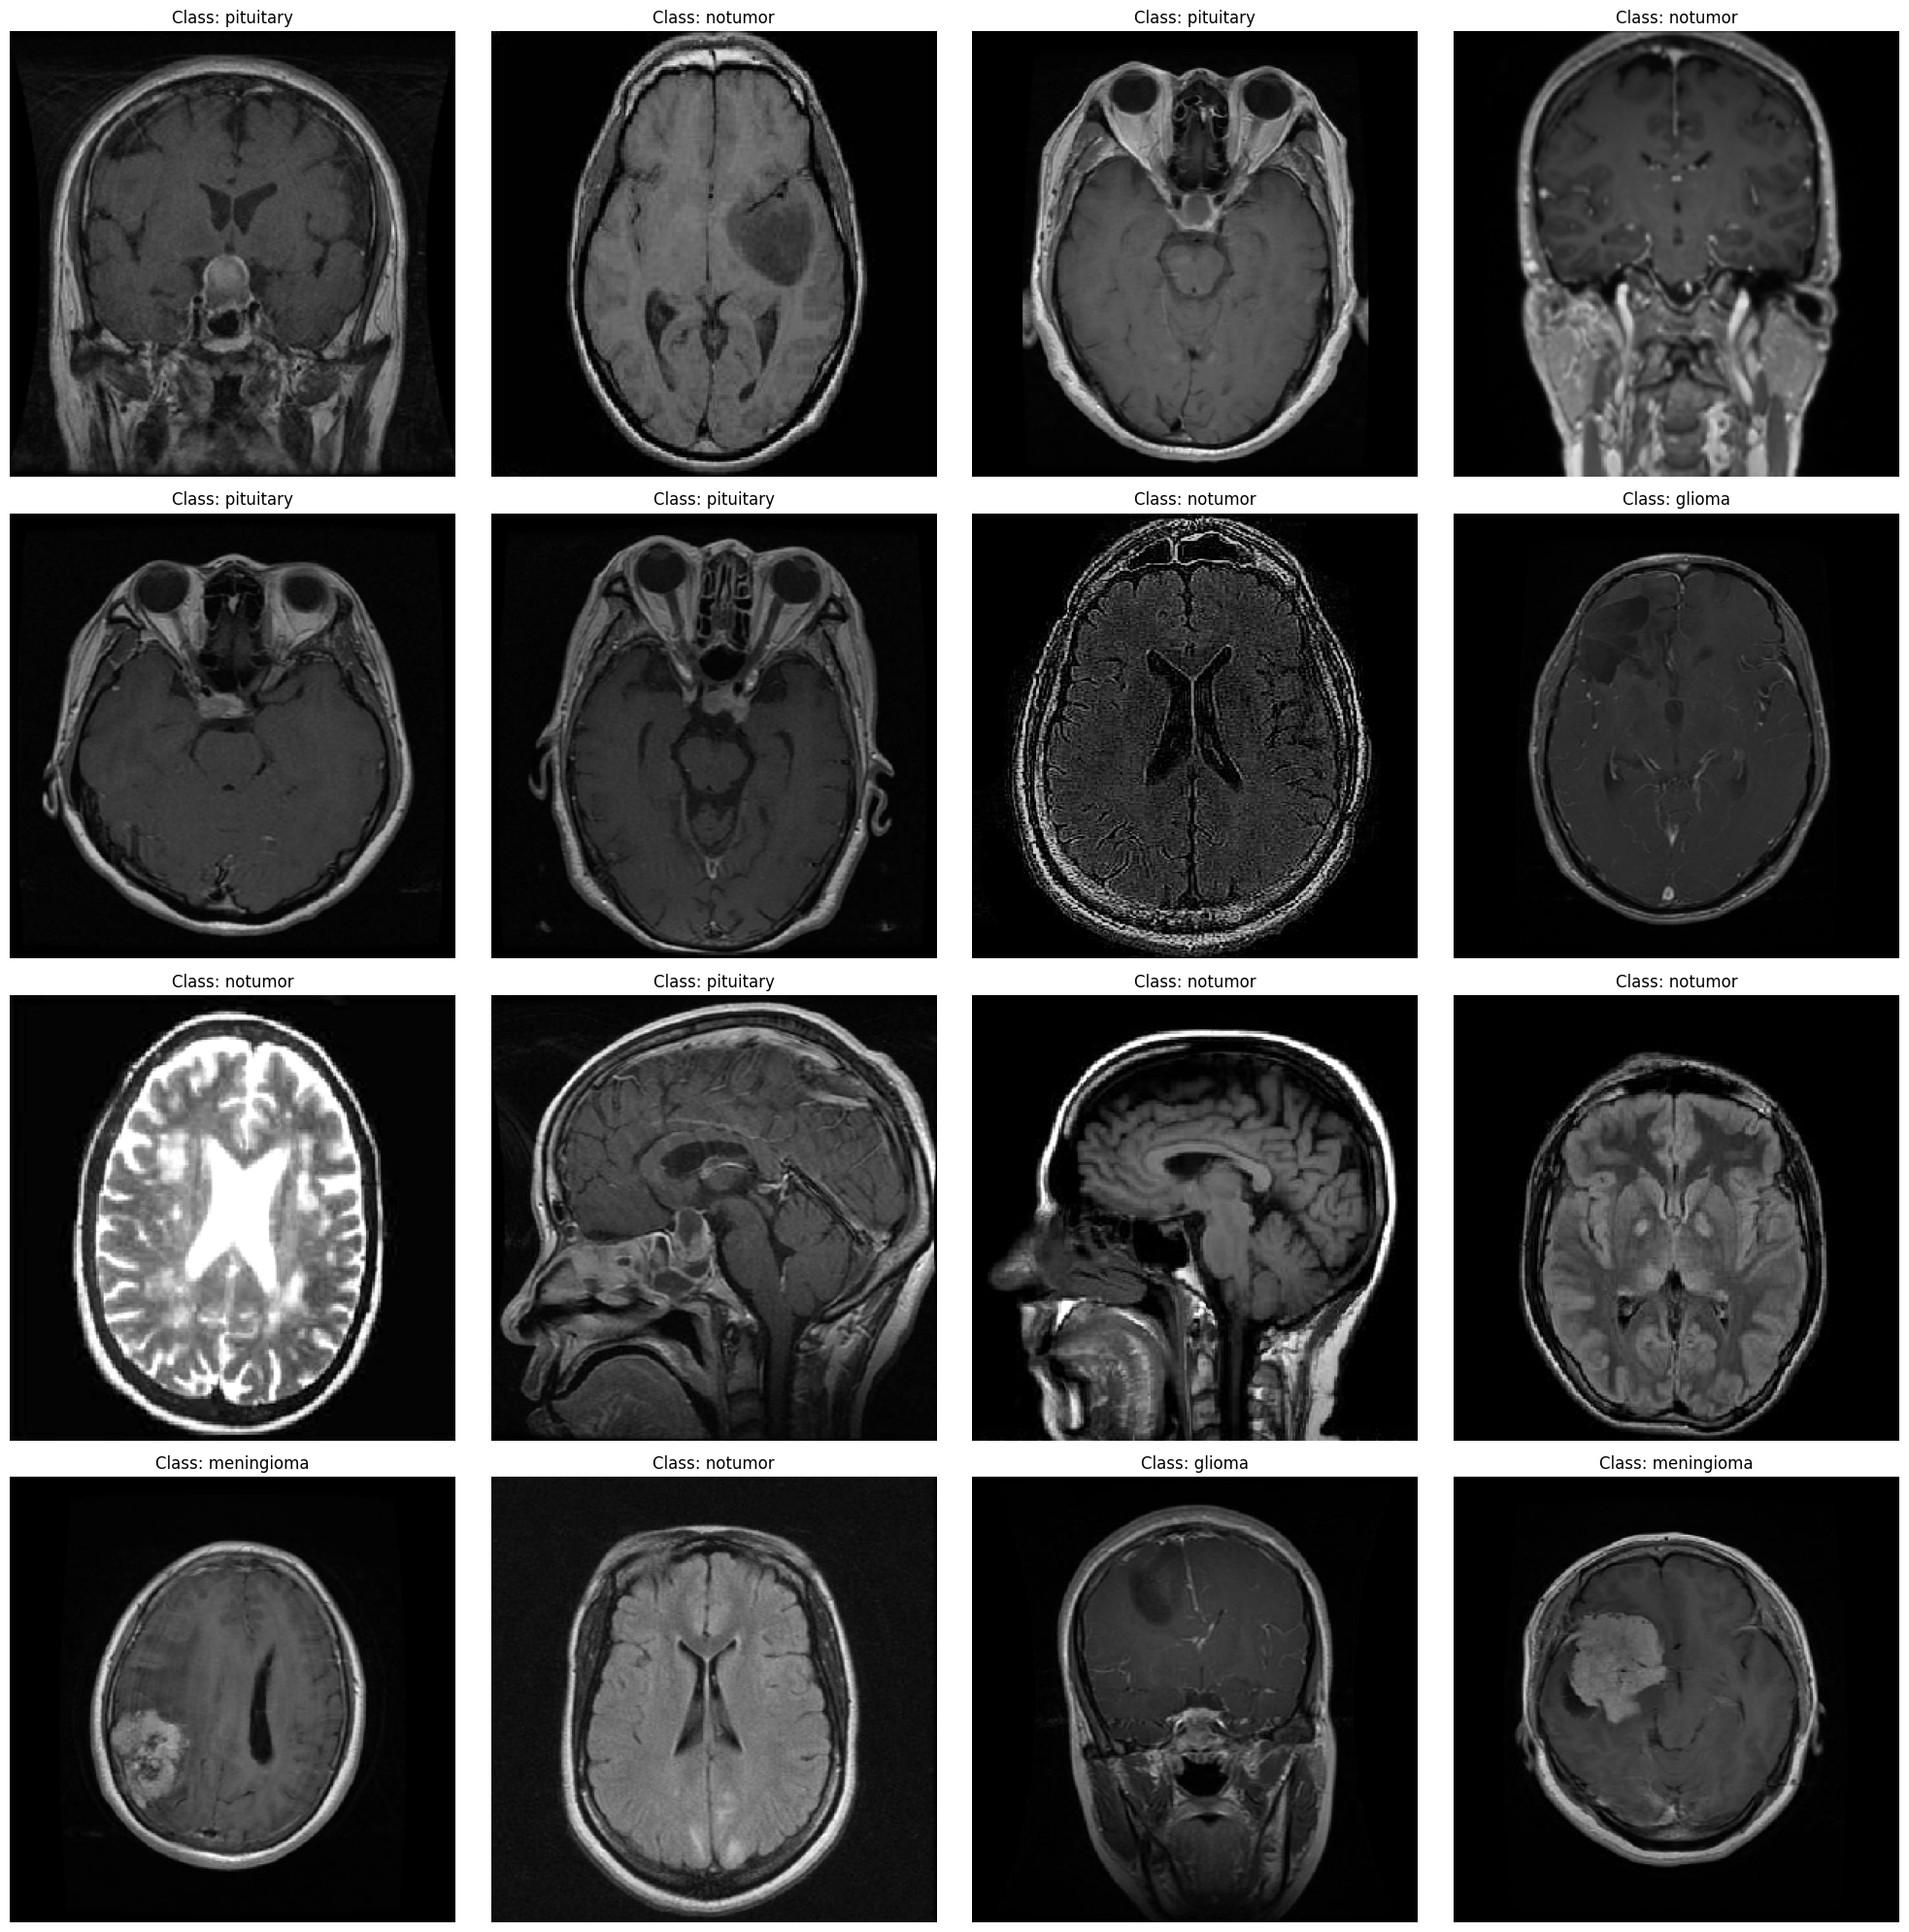

In [17]:
# Preview a few of the images in our training dataset.

plt.figure(figsize=(20, 20))

for i in range(16):
  plt.subplot(4, 4, i + 1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index.
  class_index = np.argmax(label)

  # Get the list of class names and class indices.
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices.
  index_position = class_indices.index(class_index)

  # Get the class name using the index position.
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis("off")

plt.tight_layout()
plt.show()